Load imports

In [32]:

import SimpleITK as sitk 
import os
import cv2
import cv2
import numpy as np 
import seaborn as sns
%matplotlib inline

Read a singe label image 

In [25]:
image = 'data/preprocessed/Pre-operative_TCGA_GBM_NIfTI_and_Segmentations/case_00000/truth.nii.gz'
image = sitk.ReadImage(image)
image = sitk.GetArrayFromImage(image)
image.shape

(512, 512, 611)

Lets check the max and min values

In [26]:
image.min(), image.max()

(0, 2)

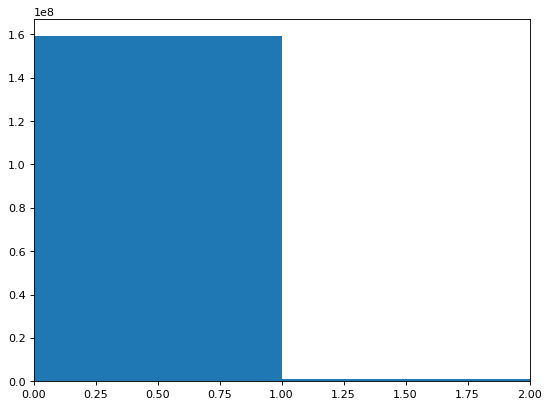

In [27]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import cv2

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
vals = image.ravel()
tentative_range = image.max() - image.min()
b, bins, patches = plt.hist(vals, int(tentative_range))
plt.xlim([image.min(),image.max()])
plt.show()

I dont understand the above figure, lets calculate percentages

In [44]:
print('Amount of Background pixels ', (np.sum(image ==0) / len(np.ravel(image)) * 100))
print('Amount of Kidney pixels ', (np.count_nonzero(image == 1) / len(np.ravel(image)) * 100))
print('Amount of Tumor Pixels ',  (np.count_nonzero(image == 2) / len(np.ravel(image)) * 100))

Amount of Background pixels  99.41676338058447
Amount of Kidney pixels  0.5716920094092036
Amount of Tumor Pixels  0.011544610006329276


Lets do a sanity check 

In [47]:
(np.sum(image ==0) / len(np.ravel(image)) * 100)+(np.count_nonzero(image == 1) / len(np.ravel(image)) * 100)+ (np.count_nonzero(image == 2) / len(np.ravel(image)) * 100)

100.0

Okay, looks good - Lets do this for all images - But that will take a long time, instead, lets get an average for the whole dataset

In [65]:
number_of_background_pixels =[]
number_of_kidney_pixels =[]
number_of_tumor_pixels =[]
all_cases_pixels =[]
image_folder = 'data/preprocessed/Pre-operative_TCGA_GBM_NIfTI_and_Segmentations'
for item in os.listdir(image_folder):
    image = sitk.ReadImage(os.path.join(image_folder, item ,'truth.nii.gz'))
    image = sitk.GetArrayFromImage(image)
    number_of_background_pixels.append(np.sum(image == 0))
    number_of_kidney_pixels.append(np.sum(image == 1))
    number_of_tumor_pixels.append(np.sum(image == 2))
    print('Case {} is Done '.format(item))

Case case_00094 is Done 
Case case_00090 is Done 
Case case_00007 is Done 
Case case_00158 is Done 
Case case_00206 is Done 
Case case_00175 is Done 
Case case_00157 is Done 
Case case_00044 is Done 
Case case_00075 is Done 
Case case_00124 is Done 
Case case_00087 is Done 
Case case_00201 is Done 
Case case_00067 is Done 
Case case_00028 is Done 
Case case_00053 is Done 
Case case_00153 is Done 
Case case_00189 is Done 
Case case_00204 is Done 
Case case_00080 is Done 
Case case_00072 is Done 
Case case_00111 is Done 
Case case_00027 is Done 
Case case_00176 is Done 
Case case_00089 is Done 
Case case_00209 is Done 
Case case_00033 is Done 
Case case_00050 is Done 
Case case_00147 is Done 
Case case_00174 is Done 
Case case_00086 is Done 
Case case_00172 is Done 
Case case_00078 is Done 
Case case_00097 is Done 
Case case_00082 is Done 
Case case_00083 is Done 
Case case_00115 is Done 
Case case_00151 is Done 
Case case_00120 is Done 
Case case_00126 is Done 
Case case_00178 is Done 


In [ ]:
sum_background = np.sum(np.array(number_of_background_pixels))
sum_kidney = np.sum(np.array(number_of_kidney_pixels))
sum_tumor = np.sum(np.array(number_of_tumor_pixels))

In [ ]:
total_image = sum_background+sum_kidney+sum_tumor

In [70]:
print('Amount of Background pixels ', (sum_background / total_image * 100))
print('Amount of Kidney pixels ', (sum_kidney / total_image * 100))
print('Amount of Tumor Pixels ',  sum_tumor / total_image * 100)

Amount of Background pixels  99.14488385650839
Amount of Kidney pixels  0.6878345526661502
Amount of Tumor Pixels  0.16728159082546376
